In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00055-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00056-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00057-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00058-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00059-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00060-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00061-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00062-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00063-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00064-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00065-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00066-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00166-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00167-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00168-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]
# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-eac935fc-02d5-469e-b37a-026c6b804c89-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,4273.361182,4273.361182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1,0.480242,32176.05,16.73,65.91,1716.394146,1716.394146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,536.72,50.0,61.72,51.054504,3.262093,50.82,8.310223e+07,9.5,10.102517,4.619502,53.840022,0.25,141.55,DDoS-UDP_Flood
2,0.000000,0.00,1.00,64.00,1.203558,1.203558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312851e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.000000,54.00,6.00,64.00,1.000349,1.000349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336190e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.077629,28369.50,16.83,63.36,10737.153745,10737.153745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,526.80,50.0,51.80,50.209774,0.545699,50.10,8.312363e+07,9.5,10.020834,0.772491,1.753938,0.18,141.55,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176929,0.000000,54.00,6.00,64.00,25.224003,25.224003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.307636e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
4176930,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
4176931,4.274490,107.85,6.00,64.00,0.463217,0.463217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.78,54.0,54.78,54.040026,0.172084,54.39,8.294658e+07,9.5,10.396218,0.246316,1.516787,0.02,141.55,DoS-TCP_Flood
4176932,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            644050
DDoS-UDP_Flood             484977
DDoS-TCP_Flood             401772
DDoS-PSHACK_Flood          365396
DDoS-SYN_Flood             363209
DDoS-RSTFINFlood           362746
DDoS-SynonymousIP_Flood    321680
DoS-UDP_Flood              297129
DoS-TCP_Flood              239305
DoS-SYN_Flood              181125
BenignTraffic               98482
Mirai-greeth_flood          89121
Mirai-udpplain              80007
Mirai-greip_flood           67009
DDoS-ICMP_Fragmentation     40398
MITM-ArpSpoofing            27593
DDoS-ACK_Fragmentation      25750
DDoS-UDP_Fragmentation      25284
DNS_Spoofing                15813
Recon-HostDiscovery         12052
Recon-OSScan                 8685
Recon-PortScan               7457
DoS-HTTP_Flood               6376
VulnerabilityScan            3357
DDoS-HTTP_Flood              2571
DDoS-SlowLoris               1951
DictionaryBruteForce         1156
SqlInjection                  509
BrowserHijacking              495
CommandInjecti

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

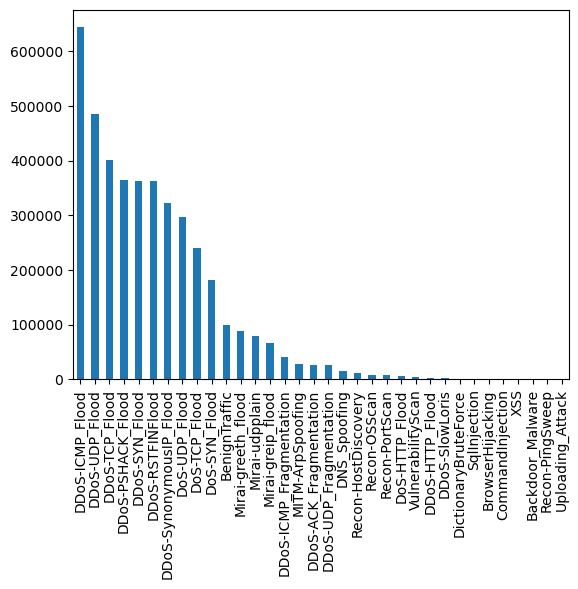

In [6]:
bar_graph('label')

In [7]:
df=df[df["label"].str.contains("DoS-TCP_Flood|DoS-SYN_Flood|BenignTraffic|Mirai-greeth_flood|Mirai-udpplain|Mirai-greip_flood|DDoS-ICMP_Fragmentation|MITM-ArpSpoofing|DDoS-ACK_Fragmentation|DDoS-UDP_Fragmentation|DNS_Spoofing|Recon-HostDiscovery|Recon-OSScanRecon-PortScan|DoS-HTTP_Flood|VulnerabilityScan|DDoS-HTTP_Flood|DDoS-SlowLoris|DictionaryBruteForce|SqlInjection|BrowserHijacking|CommandInjection|Backdoor_Malware|XSS|Uploading_Attack|Recon-PingSweep") == False]
df=df.reset_index(drop=True)
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,4273.361182,4273.361182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1,0.480242,32176.05,16.73,65.91,1716.394146,1716.394146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,536.72,50.0,61.72,51.054504,3.262093,50.82,8.310223e+07,9.5,10.102517,4.619502,53.840022,0.25,141.55,DDoS-UDP_Flood
2,0.000000,0.00,1.00,64.00,1.203558,1.203558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312851e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.000000,54.00,6.00,64.00,1.000349,1.000349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336190e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.077629,28369.50,16.83,63.36,10737.153745,10737.153745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,526.80,50.0,51.80,50.209774,0.545699,50.10,8.312363e+07,9.5,10.020834,0.772491,1.753938,0.18,141.55,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492115,0.000000,54.00,6.00,64.00,1.899248,1.899248,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.333086e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
2492116,0.248395,40709.00,17.00,64.00,3437.326551,3437.326551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309853e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
2492117,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2492118,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [8]:
df['label'].unique()

array(['DDoS-SynonymousIP_Flood', 'DDoS-UDP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood',
       'Recon-PortScan', 'Recon-OSScan'], dtype=object)

In [9]:


df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,4273.361182,4273.361182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1,0.480242,32176.05,16.73,65.91,1716.394146,1716.394146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,536.72,50.0,61.72,51.054504,3.262093,50.82,8.310223e+07,9.5,10.102517,4.619502,53.840022,0.25,141.55,DDoS-UDP_Flood
2,0.000000,0.00,1.00,64.00,1.203558,1.203558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312851e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.000000,54.00,6.00,64.00,1.000349,1.000349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336190e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.077629,28369.50,16.83,63.36,10737.153745,10737.153745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,526.80,50.0,51.80,50.209774,0.545699,50.10,8.312363e+07,9.5,10.020834,0.772491,1.753938,0.18,141.55,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492115,0.000000,54.00,6.00,64.00,1.899248,1.899248,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.333086e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
2492116,0.248395,40709.00,17.00,64.00,3437.326551,3437.326551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309853e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
2492117,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2492118,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [10]:
#change Multi-class to binary-class
#df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [11]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,4273.361182,4273.361182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,3
1,0.480242,32176.05,16.73,65.91,1716.394146,1716.394146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,536.72,50.0,61.72,51.054504,3.262093,50.82,8.310223e+07,9.5,10.102517,4.619502,53.840022,0.25,141.55,4
2,0.000000,0.00,1.00,64.00,1.203558,1.203558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312851e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
3,0.000000,54.00,6.00,64.00,1.000349,1.000349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336190e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,3
4,0.077629,28369.50,16.83,63.36,10737.153745,10737.153745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,526.80,50.0,51.80,50.209774,0.545699,50.10,8.312363e+07,9.5,10.020834,0.772491,1.753938,0.18,141.55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492115,0.000000,54.00,6.00,64.00,1.899248,1.899248,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.333086e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
2492116,0.248395,40709.00,17.00,64.00,3437.326551,3437.326551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309853e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,4
2492117,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
2492118,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,4


In [12]:
x=df.drop(columns=['label'])
y=df['label']

In [13]:
y

0          3
1          4
2          0
3          3
4          4
          ..
2492115    1
2492116    4
2492117    0
2492118    4
2492119    1
Name: label, Length: 2492120, dtype: int32

In [14]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=y)

In [15]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 1993696
Testing set: 498424


In [16]:
y_test.value_counts()

0    128810
4     96995
1     73079
2     72549
3     64336
5     59426
6      1737
7      1492
Name: label, dtype: int64

In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9117458228335714
precision: 0.9225019471092728
recall:  0.9117458228335714
f1:  0.9000931175197215


In [19]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9988122562316422
precision: 0.9988116212332009
recall:  0.9988122562316422
f1:  0.9988111364948404


In [20]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.9063347671861708
precision: 0.9259724778613523
recall:  0.9063347671861708
f1:  0.8886973225551152


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
gb_acc=clf3.score(x_test,y_test)
pred=clf3.predict(x_test)

gb_prec=precision_score(y_test,pred,average='weighted')
gb_rec=recall_score(y_test,pred,average='weighted')
gb_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',gb_acc)
print('precision:', gb_prec)
print('recall: ', gb_rec)
print('f1: ', gb_f1)

accuracy: 0.9973972072737505
precision: 0.9973595115253141
recall:  0.9973972072737505
f1:  0.9973551269985251


# Neural network

In [21]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [22]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1993696, 46)
(1993696, 8)
(498424, 46)
(498424, 8)


In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [25]:
input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(8, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [26]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/50
24907/24922 [============================>.] - ETA: 0s - loss: 0.0572 - accuracy: 0.9754
Epoch 1: val_accuracy improved from -inf to 0.99337, saving model to nn.hdf5
24922/24922 [==============================] - 43s 2ms/step - loss: 0.0571 - accuracy: 0.9754 - val_loss: 0.0137 - val_accuracy: 0.9934
Epoch 2/50
24909/24922 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9947
Epoch 2: val_accuracy improved from 0.99337 to 0.99528, saving model to nn.hdf5
24922/24922 [==============================] - 43s 2ms/step - loss: 0.0120 - accuracy: 0.9947 - val_loss: 0.0119 - val_accuracy: 0.9953
Epoch 3/50
24921/24922 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9950
Epoch 3: val_accuracy improved from 0.99528 to 0.99555, saving model to nn.hdf5
24922/24922 [==============================] - 41s 2ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.0093 - val_accuracy: 0.9956
Epoch 4/50
24909/24922 [============================>.]

24897/24922 [============================>.] - ETA: 0s - loss: 0.0403 - accuracy: 0.9917
Epoch 29: val_accuracy did not improve from 0.99555
24922/24922 [==============================] - 41s 2ms/step - loss: 0.0403 - accuracy: 0.9917 - val_loss: 0.0404 - val_accuracy: 0.9917
Epoch 30/50
24918/24922 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.9918
Epoch 30: val_accuracy did not improve from 0.99555
24922/24922 [==============================] - 40s 2ms/step - loss: 0.0397 - accuracy: 0.9918 - val_loss: 0.0440 - val_accuracy: 0.9920
Epoch 31/50
24893/24922 [============================>.] - ETA: 0s - loss: 0.0424 - accuracy: 0.9916
Epoch 31: val_accuracy did not improve from 0.99555
24922/24922 [==============================] - 40s 2ms/step - loss: 0.0424 - accuracy: 0.9916 - val_loss: 0.0398 - val_accuracy: 0.9919
Epoch 32/50
24921/24922 [============================>.] - ETA: 0s - loss: 0.0420 - accuracy: 0.9913
Epoch 32: val_accuracy did not improve from 

Text(0, 0.5, 'accuracy')

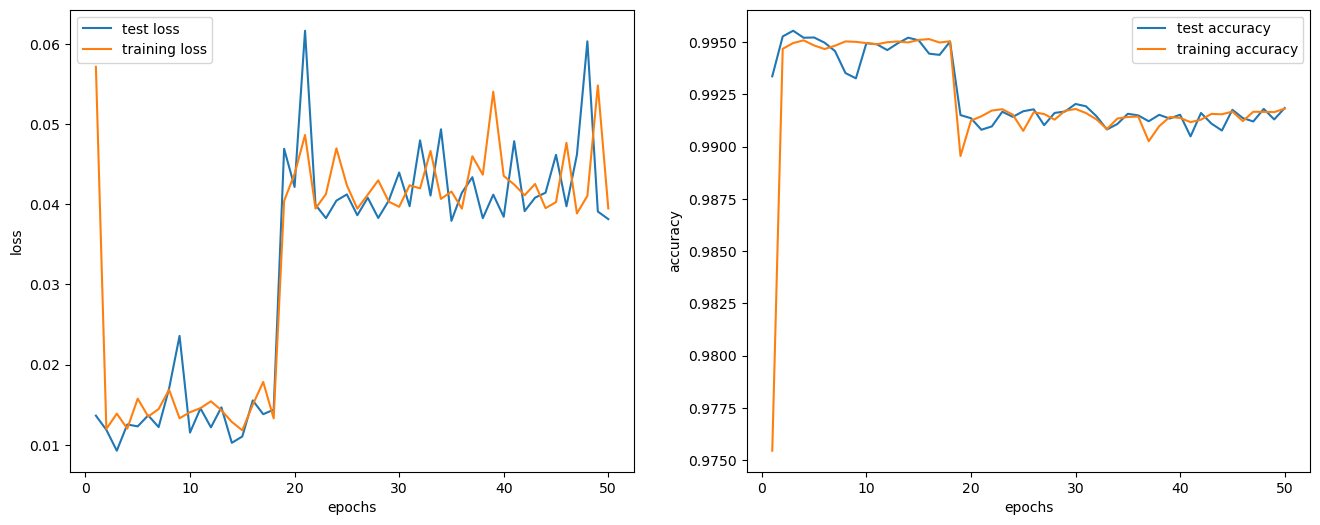

In [27]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,51,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,51,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,51,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,51,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

15576/15576 [==============================] - 11s 730us/step
Precision score:  0.9958976259872845
Recall score:  0.9958268462192832
F1 score:  0.9955277170785916


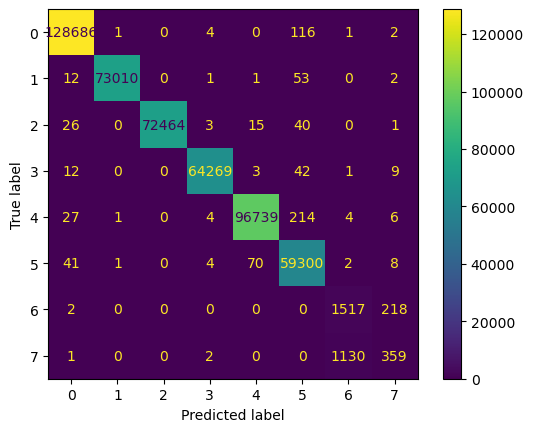

In [28]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))
ConfusionMatrixDisplay.from_predictions(y_test1, dnn_pred)